In [1]:
import dtoolcore
import dtoolcore.utils as utils
import time
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import re

In [55]:
rootdir = os.getcwd()

# pat = r'canal_\d+\.\d+_\d+'
pat = r'\d+\.\d+'
path = rootdir+"/dtool_db1/"
#print(path)
def get_data_directories(root_dir):
    data_dirs = []
    for root, dirs, files in os.walk(root_dir):
        if root.endswith('/data'):
            data_dirs.append(root)
    return data_dirs

datadir_list = get_data_directories(path)


def plot_res(pt, file, title, yl='Massflowrate in kg/s', fkt=np.mean, legend=False):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    for i in datadir_list:
        if "_3" in i:
            match = re.search(pt, i)
            extracted = match.group()
            if cu ==0:
                mfl = np.loadtxt(i+file).reshape(1, -1)
                cu += 1
                ax.scatter(float(extracted), fkt(mfl[0,:]))
            else:
                mfl = np.append(mfl, np.loadtxt(i+file).reshape(1, -1), axis=0)
                cu+=1
                ax.scatter(float(extracted),fkt(mfl[cu-1,:]))
    if legend:
        ax.legend()
    ax.set_xlabel(r'radius in r/H', fontsize=14)
    ax.set_ylabel(yl, fontsize=14)

In [3]:
datadir_list

['/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db1/parametric_canal_0.02_500.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db1/canal_0.35_140/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db1/parametric_canal_0.50_1322.9/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db1/parametric_canal_0.01_345.7/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db1/parametric_canal_0.03_400.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db1/parametric_canal_0.03_1640.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db1/parametric_canal_0.12_182.9/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db1/parametric_canal_0.01_1800.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db1/parametric_canal_0.01_500.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db1/parametric_cana

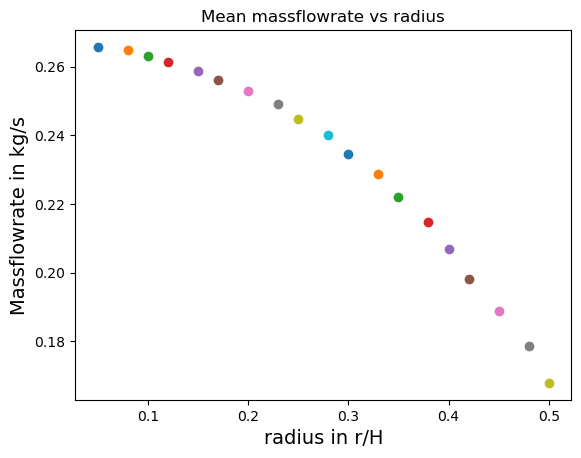

In [63]:
plot_res(pat, "/massflowrate.txt", "Mean massflowrate vs radius")

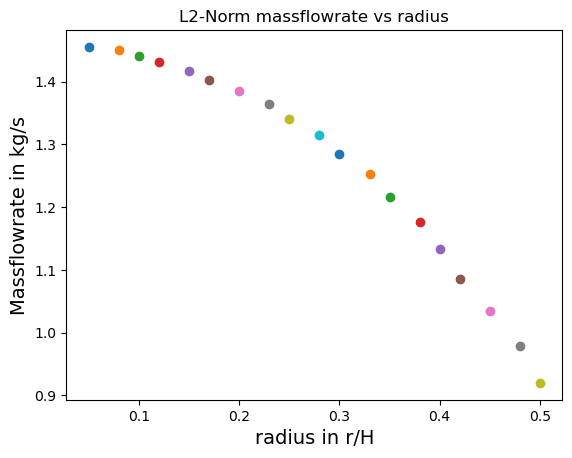

In [16]:
plot_res(pat, "/massflowrate.txt", "L2-Norm massflowrate vs radius", fkt=np.linalg.norm)


In [ ]:
def ret_mid_element(x):
    return x[int(x[0].size/2)]

#plot_res(pat, "/massflowrate.txt", "massflowrate at obstacle vs radius", fkt=ret_mid_element)

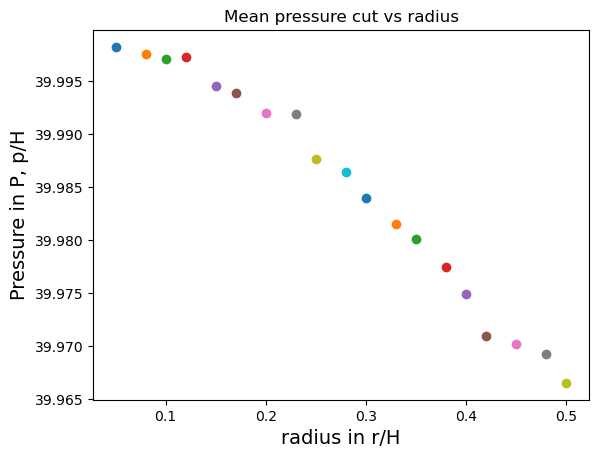

In [17]:
plot_res(pat, "/pressure_avg.txt", "Mean pressure cut vs radius", yl="Pressure in P, p/H")

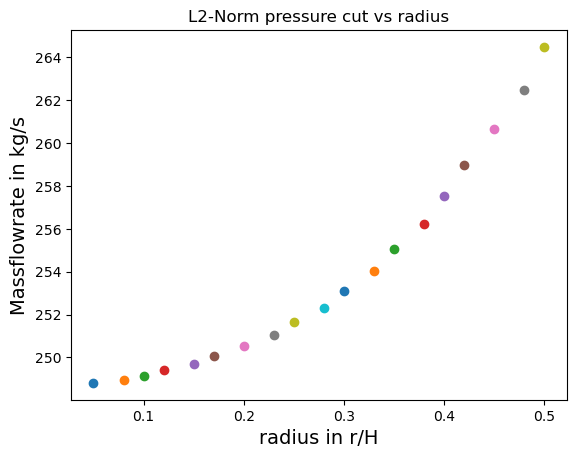

In [18]:
plot_res(pat, "/pressure_avg.txt", "L2-Norm pressure cut vs radius", fkt=np.linalg.norm)

/tmp/ipykernel_7153/283100055.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


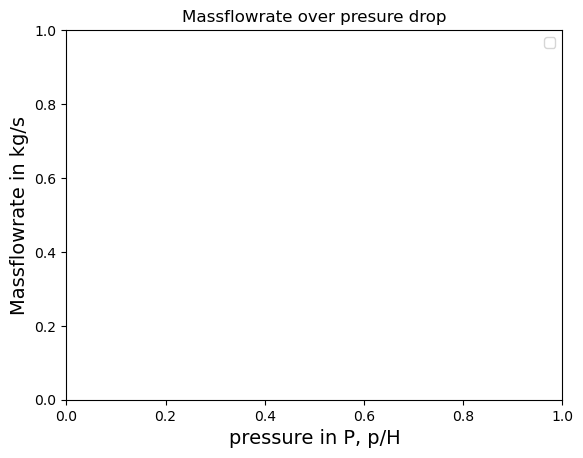

In [29]:
def plot_amp(pt, file, title, yl='Massflowrate in kg/s', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    for i in datadir_list:
        if "3.txt" in i:
            match = re.search(pt, i)
            extracted = match.group()
            if cu ==0:
                mfl = np.loadtxt(i+file)
                pr_delta = np.linspace(80,0,mfl.size)
                pr = np.loadtxt(i+"/pressure_avg.txt")
                cu += 1
                ax.plot(pr, mfl, label=f'r= {extracted:s}')
            elif cu in s:
                mfl = np.loadtxt(i+file)
                pr_delta = np.linspace(80,0,mfl.size)
                pr = np.loadtxt(i+"/pressure_avg.txt")
                cu+=1
                ax.plot(pr, mfl, label=f'r= {extracted:s}')
            cu+=1
        if legend:
            ax.legend()
        ax.set_xlabel(r'pressure in P, p/H', fontsize=14)
        ax.set_ylabel(yl, fontsize=14)

plot_amp(pat,"/massflowrate.txt","Massflowrate over presure drop")

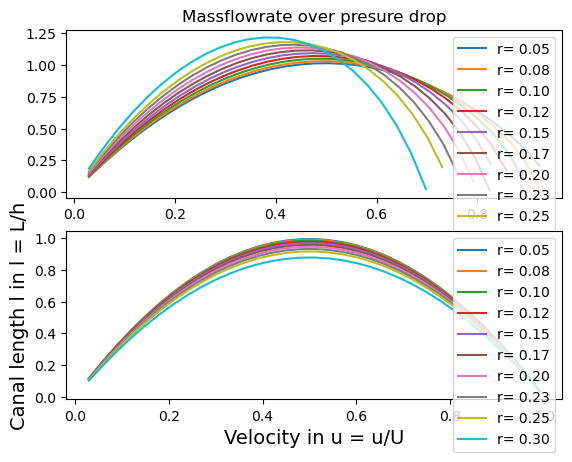

In [55]:
def plot_amp(pt, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots(2)
    ax[0].set_title(title)
    cu = 0
    for i in datadir_list:
        match = re.search(pt, i)
        extracted = match.group()
        if cu ==0:
            u = np.loadtxt(i+file)
            pr = np.loadtxt(i+"/y_at_.5.txt")
            u2 = np.loadtxt(i+"/x_at_1.txt")
            pr2 = np.loadtxt(i+"/y_at_1.txt")
            cu += 1
            ax[0].plot(u,pr, label=f'r= {extracted:s}')
            ax[1].plot(u2,pr2, label=f'r= {extracted:s}')
        elif cu in s:
            u = np.loadtxt(i+file)
            pr = np.loadtxt(i+"/y_at_.5.txt")
            u2 = np.loadtxt(i+"/x_at_1.txt")
            pr2 = np.loadtxt(i+"/y_at_1.txt")
            cu+=1
            ax[0].plot(u,pr, label=f'r= {extracted:s}')
            ax[1].plot(u2,pr2, label=f'r= {extracted:s}')
        cu+=1
    if legend:
        ax[0].legend()
        ax[1].legend()
    ax[1].set_xlabel(r'Velocity in u = u/U', fontsize=14)
    ax[1].set_ylabel(r'Canal length l in l = L/h', fontsize=14)

plot_amp(pat,"/x_at_.5.txt","Massflowrate over presure drop")

In [70]:
radii = np.array([.01,.06,.12,.17,.22,.27,.33,.41,.50,.58,.67,])
press = np.linspace(20,2300,15)

pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'


for k in datadir_list:
    print(k)
    break
    match = re.search(pat, k)
    match2 = re.search(pat2, k)
    extracted = match.group()
    extracted2 = match2.group()
    print(extracted, extracted2)

/home/ilia/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db/parametric_canal_0.01_20.0/data


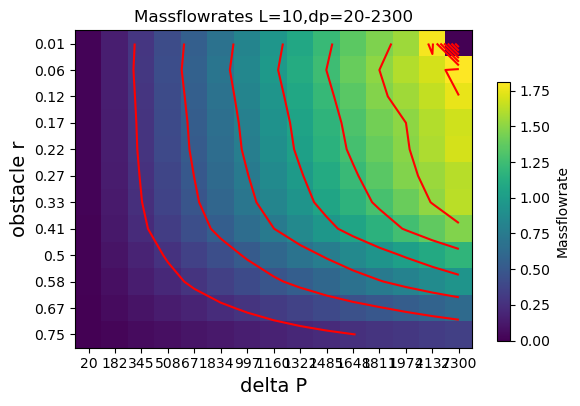

In [65]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'

def plot_mfl(pt, pt2, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    radii = np.array([.01,.06,.12,.17,.22,.27,.33,.41,.50,.58,.67,.75])
    press = np.round(np.linspace(20,2300,15),1)
    arr = np.empty((12, 15))
    for i in datadir_list:
        if "parametric_canal" not in i:
            continue
        # print(i+file)
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        if match == None:
            print("match",i)
        if match2 == None:
            print("match2",i)
        extracted = match.group()
        extracted2 = match2.group()
        if cu ==0:
            u = np.loadtxt(i+file)
            #print(i+file)
            #print(u)
            cu += 1
            #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = u[0]

        else:
            if not os.path.exists(i+file):
                print(i+file)
            u = np.loadtxt(i+file)
            #print(i+file)
            #print(u)
            cu+=1
            #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
            if u[0] > 100 or u[0] < -100:
                u[:] = 0
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = u[0]

    # neg = ax.contour(arr)
    neg = ax.imshow(arr)
    ax.contour(arr, colors='red')
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels((press).astype(int))
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7, label="Massflowrate")
    #if legend:
    #    ax.legend()
    ax.set_ylabel(r'obstacle r', fontsize=14)
    ax.set_xlabel(r'delta P', fontsize=14)
    ax.set_title("Massflowrates L=10,dp=20-2300")
    return arr

ret = plot_mfl(pat, pat2, "/massflowrate_0.60/massflowrate.txt", "Massflowrate", yl='P delta', legend=True)


In [25]:
pt = r'\d+\.\d+(?=_)'
pt2 = r'\d+\.\d+(?=/)'
k = "/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db1/parametric_canal_0.02_500.0/data/massflowrate_0.60/massflowrate.txt"
i = "/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db1/parametric_canal_0.02_500.0/data"
match = re.search(pt, i)
match2 = re.search(pt2, i)
extracted = match.group()
extracted2 = match2.group()
print(extracted, extracted2)
print(os.path.exists(k))
np.loadtxt(k)

0.02 500.0
True


array([0.41021193, 0.42563105, 0.41254218])

In [124]:
ret.shape

(12, 15)

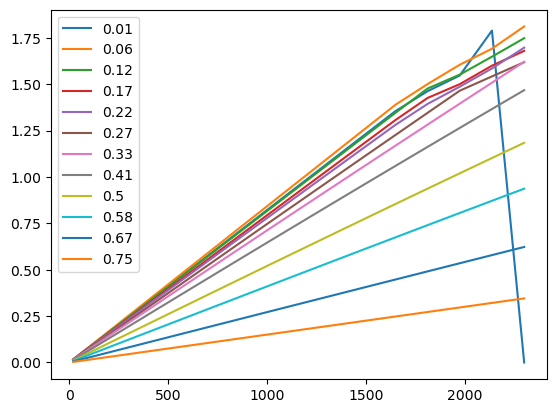

In [54]:
radii = np.array([.01,.06,.12,.17,.22,.27,.33,.41,.50,.58,.67,.75])
press = np.round(np.linspace(20,2300,15),1)
plt.plot(press, ret.T, label=radii)
plt.legend()

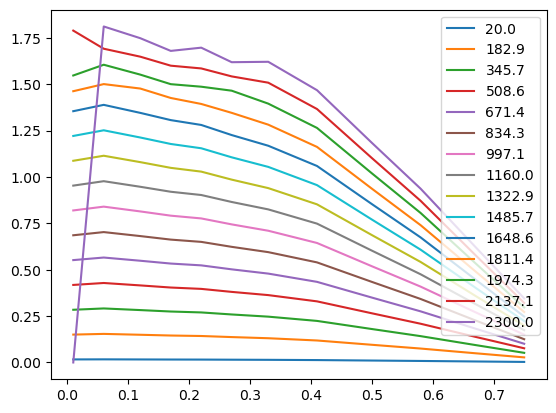

In [53]:
radii = np.array([.01,.06,.12,.17,.22,.27,.33,.41,.50,.58,.67,.75])
press = np.round(np.linspace(20,2300,15),1)
plt.plot(radii, ret, label=press)
plt.legend()

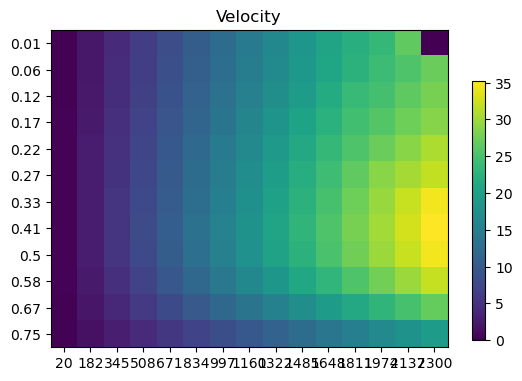

In [46]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'

def plot_mfl(pt, pt2, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    radii = np.array([.01,.06,.12,.17,.22,.27,.33,.41,.50,.58,.67,.75])
    press = np.round(np.linspace(20,2300,15),1)
    arr = np.empty((12, 15))
    for i in datadir_list:
        if "parametric_canal" not in i:
            continue
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        extracted = match.group()
        extracted2 = match2.group()
        if cu ==0:
            u = np.loadtxt(i+file+"")
            cu += 1
            if u[0] > 100 or u[0] < -100:
                u[:] = 0
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

        else:
            u = np.loadtxt(i+file)
            if u[0] > 100 or u[0] < -100:
                u[:] = 0
            cu+=1
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

    neg = ax.imshow(arr)
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels((press).astype(int))
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
    #if legend:
    #    ax.legend()
    #ax.set_xlabel(r'obstacle r', fontsize=14)
    #ax.set_ylabel(r'delta P', fontsize=14)

plot_mfl(pat, pat2, "/y_at_5_0.60/y_at_5.txt", "Velocity", yl='P delta', legend=True)

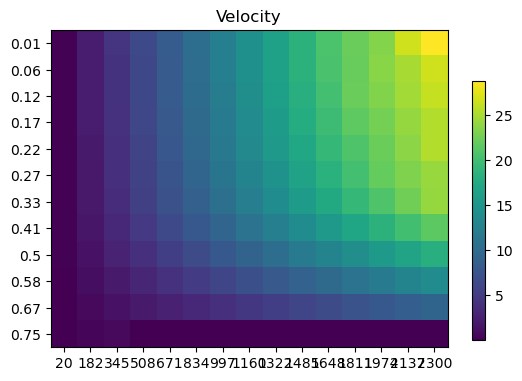

In [108]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'

def plot_mfl(pt, pt2, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    radii = np.array([.01,.06,.12,.17,.22,.27,.33,.41,.50,.58,.67,.75])
    press = np.round(np.linspace(20,2300,15),1)
    arr = np.empty((12, 15))
    for i in datadir_list:
        #print(i+file)
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        extracted = match.group()
        extracted2 = match2.group()
        #print(extracted)
        #print(extracted2)
        if cu ==0:
            u = np.loadtxt(i+file+"")
            #print(i)
            #print(u)
            cu += 1
            #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

        else:
            u = np.loadtxt(i+file)
            #print(i)
            #print(u)
            cu+=1
            #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

    neg = ax.imshow(arr)
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels((press).astype(int))
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
    #if legend:
    #    ax.legend()
    #ax.set_xlabel(r'obstacle r', fontsize=14)
    #ax.set_ylabel(r'delta P', fontsize=14)

plot_mfl(pat, pat2, "/y_at_0_0.60/y_at_0.txt", "Velocity", yl='P delta', legend=True)

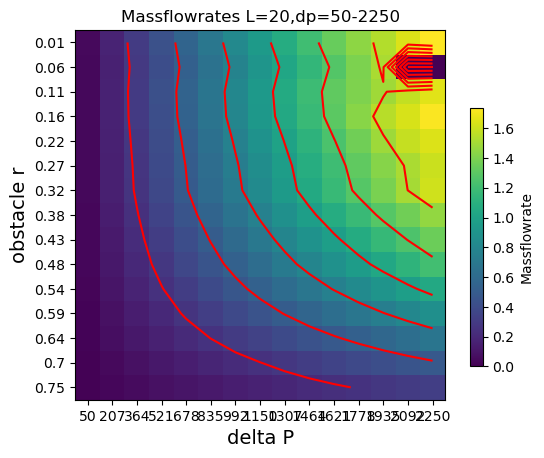

In [66]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'

def plot_mfl(pt, pt2, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    radii = np.array([.01,.06,.11,.16,.22,.27,.32,.38,.43,.48,.54,.59,.64,.70,.75])
    press = np.round(np.linspace(50,2250,15),1)
    arr = np.empty((15, 15))
    for i in datadir_list:
        if "parametric2_canal" not in i:
            continue
        # print(i+file)
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        if match == None:
            print("match",i)
        if match2 == None:
            print("match2",i)
        extracted = match.group()
        extracted2 = match2.group()
        if cu ==0:
            u = np.loadtxt(i+file)
            #print(i+file)
            #print(u)
            cu += 1
            #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = u[0]

        else:
            if not os.path.exists(i+file):
                print(i+file)
            u = np.loadtxt(i+file)
            #print(i+file)
            #print(u)
            cu+=1
            #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
            if u[0] > 100 or u[0] < -100:
                u[:] = 0
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = u[0]

    # neg = ax.contour(arr)
    neg = ax.imshow(arr)
    ax.contour(arr, colors='red')
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels((press).astype(int))
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7, label="Massflowrate")
    #if legend:
    #    ax.legend()
    ax.set_ylabel(r'obstacle r', fontsize=14)
    ax.set_xlabel(r'delta P', fontsize=14)
    ax.set_title("Massflowrates L=20,dp=50-2250")
    return arr

ret = plot_mfl(pat, pat2, "/massflowrate_0.60/massflowrate.txt", "Massflowrate", yl='P delta', legend=True)


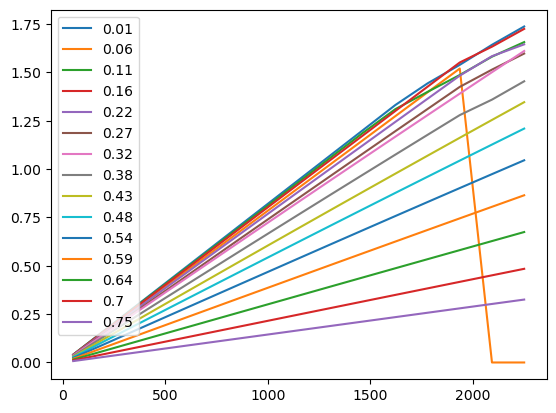

In [61]:
radii = np.array([.01,.06,.11,.16,.22,.27,.32,.38,.43,.48,.54,.59,.64,.70,.75])
press = np.round(np.linspace(50,2250,15),1)
plt.plot(press, ret.T, label=radii)
plt.legend()

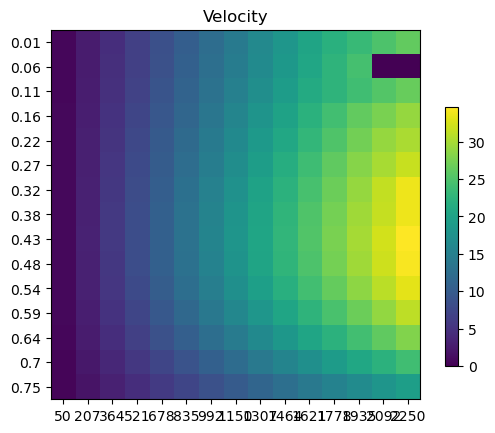

In [74]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'

def plot_mfl(pt, pt2, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    radii = np.array([.01,.06,.11,.16,.22,.27,.32,.38,.43,.48,.54,.59,.64,.70,.75])
    press = np.round(np.linspace(50,2250,15),1)
    arr = np.empty((15, 15))
    for i in datadir_list:
        if "parametric2_canal" not in i:
            continue
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        extracted = match.group()
        extracted2 = match2.group()
        if cu ==0:
            u = np.loadtxt(i+file+"")
            cu += 1
            if u[0] > 100 or u[0] < -100:
                u[:] = 0
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

        else:
            u = np.loadtxt(i+file)
            if u[0] > 100 or u[0] < -100:
                u[:] = 0
            cu+=1
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

    neg = ax.imshow(arr)
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels((press).astype(int))
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
    #if legend:
    #    ax.legend()
    #ax.set_xlabel(r'obstacle r', fontsize=14)
    #ax.set_ylabel(r'delta P', fontsize=14)

plot_mfl(pat, pat2, "/y_at_5_0.60/y_at_5.txt", "Velocity", yl='P delta', legend=True)

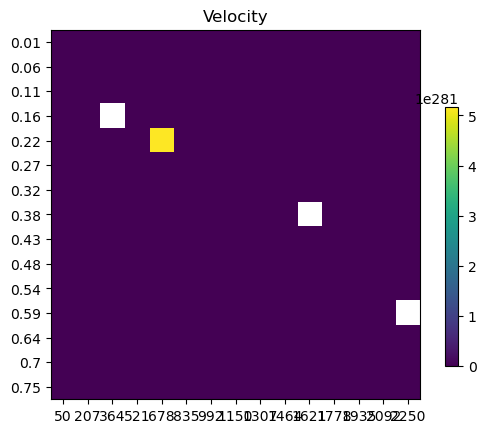

In [16]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'

def plot_mfl(pt, pt2, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    radii = np.array([.01,.06,.11,.16,.22,.27,.32,.38,.43,.48,.54,.59,.64,.70,.75])
    press = np.round(np.linspace(50,2250,15),1)
    arr = np.empty((15, 15))
    for i in datadir_list:
        #print(i+file)
        if "parametric2_canal" not in i:
            continue
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        extracted = match.group()
        extracted2 = match2.group()
        #print(extracted)
        #print(extracted2)
        if cu ==0:
            u = np.loadtxt(i+file+"")
            #print(i)
            #print(u)
            cu += 1
            #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

        else:
            u = np.loadtxt(i+file)
            #print(i)
            #print(u)
            cu+=1
            #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

    neg = ax.imshow(arr)
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels((press).astype(int))
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
    #if legend:
    #    ax.legend()
    #ax.set_xlabel(r'obstacle r', fontsize=14)
    #ax.set_ylabel(r'delta P', fontsize=14)

plot_mfl(pat, pat2, "/y_at_0_0.60/y_at_0.txt", "Velocity", yl='P delta', legend=True)

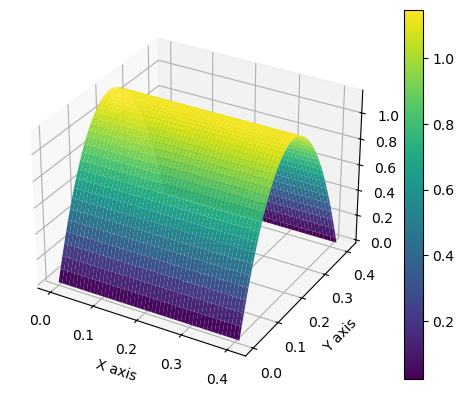

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def my_function(u, y, t):
    return 4 * u * np.sin(t * np.pi / 8) * y * (0.41 - y) / (0.41**2)

# Create a mesh grid
x = np.linspace(0, 0.41, 100)
y = np.linspace(0, 0.41, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the function on the grid
t = 1  # Example time value
Z = my_function(3, Y, t)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Function Value')

plt.colorbar(surf)
plt.show()
